# Example evaluation

This notebook contains various model evaluation techniques, including:
- __Confusion matrix__
- __Classification report__
- __Cross-validation statistics__
- __Feature importance (impurity-based/permuation-based)__
- __ROC curve and AUC__


In [57]:
import pickle

with open('model/classifier.pkl', 'rb') as f:
    clf = pickle.load(f)
    
with open('model/test_data.pkl', 'rb') as f:
    X_test = pickle.load(f)
    y_test = pickle.load(f)
    
with open('model/feature_data.pkl', 'rb') as f:
    fn = pickle.load(f)
    cn = pickle.load(f)
    dl = pickle.load(f)

### Confusion matrix

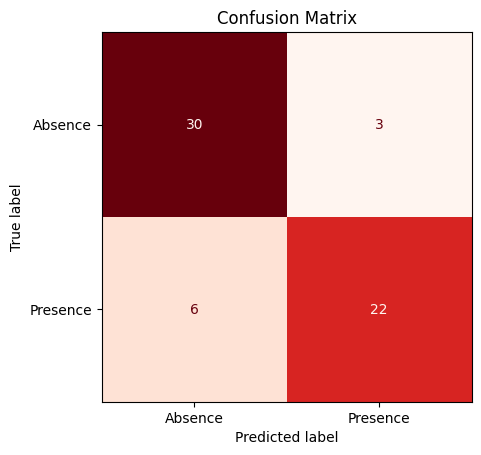

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

sns.reset_defaults()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=dl, cmap='Reds', colorbar=False)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### Classification report

In [59]:
import pandas as pd

from sklearn.metrics import classification_report

y_true = y_test.values.ravel()
y_pred = clf.predict(X_test)
report = classification_report(y_true, y_pred, target_names=dl, zero_division=0.0, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Absence,0.833333,0.909091,0.869565,33.000000
Presence,0.880000,0.785714,0.830189,28.000000
accuracy,0.852459,0.852459,0.852459,0.852459
macro avg,0.856667,0.847403,0.849877,61.000000
weighted avg,0.854754,0.852459,0.851491,61.000000


### Hyperparameter tuning ranks

In [60]:
import pandas as pd

df = pd.read_csv('model/cv_results.csv')
df = df.sort_values('rank_test_score')
columns = [i.removeprefix('param_') for i in df.columns if 'param_' in i]    
columns.append('rank')
df = pd.DataFrame(df, columns=[i for i in df.columns if 'param_' in i or 'rank' in i])
df.columns = columns
df

,n_estimators,min_samples_split,min_samples_leaf,max_leaf_nodes,max_features,max_depth,rank
2,500,5,10,100.0,log2,10.0,1
6,10,20,10,100.0,log2,20.0,2
1,10,5,2,NaN,sqrt,NaN,3
4,100,20,5,50.0,log2,20.0,4
0,10,20,1,100.0,sqrt,10.0,5
8,10,2,10,10.0,NaN,20.0,6
3,500,2,10,20.0,NaN,100.0,7
9,100,10,1,20.0,NaN,100.0,8
5,10,5,10,10.0,NaN,50.0,9
7,10,2,10,100.0,NaN,50.0,10


### Full hyperparameter tuning report

In [61]:
import pandas as pd

df = pd.read_csv('model/cv_results.csv')
df = df.sort_values('rank_test_score')
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2,0.573351,0.061295,0.040844,0.007615,500,5,10,100.0,log2,10.0,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.877653,0.836735,0.833333,0.728572,0.788690,0.812997,0.050746,1
6,6,0.020709,0.002111,0.016343,0.001436,10,20,10,100.0,log2,20.0,"{'n_estimators': 10, 'min_samples_split': 20, ...",0.877653,0.877858,0.833333,0.750000,0.686814,0.805132,0.075342,2
1,1,0.026291,0.005338,0.016788,0.001289,10,5,2,NaN,sqrt,NaN,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.836735,0.773205,0.832451,0.748677,0.790564,0.796327,0.033989,3
4,4,0.093404,0.005131,0.036319,0.024088,100,20,5,50.0,log2,20.0,"{'n_estimators': 100, 'min_samples_split': 20,...",0.877653,0.796430,0.833333,0.706790,0.766194,0.796080,0.058151,4
0,0,0.029516,0.006645,0.016793,0.002273,10,20,1,100.0,sqrt,10.0,"{'n_estimators': 10, 'min_samples_split': 20, ...",0.836871,0.796259,0.812089,0.750435,0.770331,0.793197,0.030414,5
8,8,0.022353,0.003956,0.027376,0.020636,10,2,10,10.0,NaN,20.0,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.898044,0.836735,0.812089,0.687908,0.684590,0.783873,0.084489,6
3,3,0.610540,0.026136,0.033233,0.012498,500,2,10,20.0,NaN,100.0,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.856903,0.835763,0.833333,0.708333,0.664903,0.779847,0.077784,7
9,9,0.133623,0.009658,0.031316,0.011085,100,10,1,20.0,NaN,100.0,"{'n_estimators': 100, 'min_samples_split': 10,...",0.836871,0.816635,0.810754,0.708333,0.676477,0.769814,0.064586,8
5,5,0.026305,0.004634,0.016718,0.002401,10,5,10,10.0,NaN,50.0,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.836871,0.835763,0.832451,0.687908,0.646296,0.767858,0.083325,9
7,7,0.019687,0.001565,0.016620,0.001761,10,2,10,100.0,NaN,50.0,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.836735,0.774941,0.770331,0.750000,0.645056,0.755412,0.062330,10


### Impurity-based feature importance

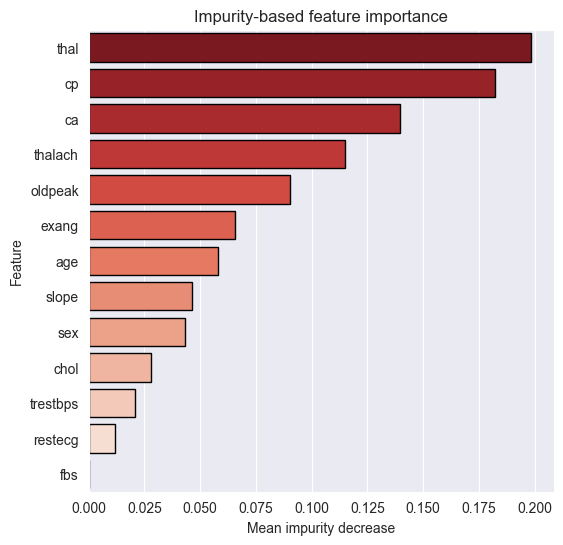

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fi = pd.Series(clf.feature_importances_, index=fn)
fi = fi.sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.reset_defaults()
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
plot = sns.barplot(x=fi.values, y=fi.index, hue=fi.index, palette='Reds_r', color='red')
plot.set_title('Impurity-based feature importance')
plot.set_xlabel('Mean impurity decrease')
plot.set_ylabel('Feature')
plt.show()

### Permutation-based feature importance

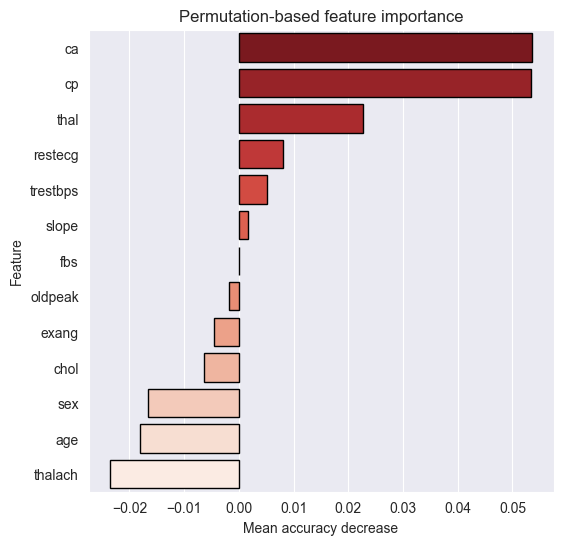

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

pi = permutation_importance(clf, X_test, y_test, n_repeats=10, scoring='f1_weighted')
fi = pd.Series(pi.importances_mean, index=fn)
fi = fi.sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.reset_defaults()
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
plot = sns.barplot(x=fi.values, y=fi.index, hue=fi.index, palette='Reds_r')
plot.set_title('Permutation-based feature importance')
plot.set_xlabel('Mean accuracy decrease')
plot.set_ylabel('Feature')
plt.show()

### ROC curve and AUC

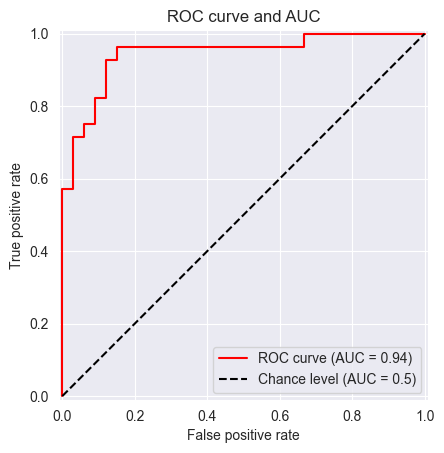

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

sns.reset_defaults()
sns.set_style('darkgrid')
disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, name='ROC curve', plot_chance_level=True)
disp.ax_.set_title('ROC curve and AUC')
disp.ax_.set_xlabel('False positive rate')
disp.ax_.set_ylabel('True positive rate')
disp.line_.set_color('red')
disp.ax_.legend()
plt.show()